# Análise de perfis de pacientes: determinar se um perfil está em risco ou não

Este projeto centra-se na análise (classificação supervisionada) de perfis de pacientes para descobrir se estão ou não em risco com base no seu perfil, de acordo com o nível de poluição, utilizando técnicas de redes neurais profundas. Apenas para fins educacionais.


##### Copyright (c) 2024, CKALOMBOLA
<p xmlns:cc="http://creativecommons.org/ns#" >Este projeto está licenciado sob  <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0

###  Importação das bibliotecas necessárias para o projeto

In [3]:
# Importar as libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score

### 1)- Carregando a base de dados:
- Em uma classe Deep, definimos uma função de deepLearning onde primeiro será carregado aas duas bases de dados risk e noRisk.

- Em seguida, adicionamos uma coluna `"type"` que será nossa variável alvo com um valor de `"1"` para as pessoas no dataframe de risco e `"0"` para as pessoas no dataframe sem risco.

### 2)- Preparação do conjunto de dados de treinamento e teste:
- Divisão da base de dados em um conjunto de treinamento  e teste

### 3)- Construção do modelo
- Normalização do conjunto de dados, e cronstrução do modelo de treinamento e configurações.

<ipython-input-10-41086a351c39>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peoples = risk.append(noRisk, ignore_index=True)


        ID  weight  height  age  gender  smoking  drinking  Code Postal  \
0        1      90     193   69       1        1         1         6000   
1        2      49     160   69       1        1         1         6670   
2        3      87     198   69       0        1         1         6300   
3        4      89     194   72       0        0         0         6540   
4        5      67     183   67       1        0         0        59100   
...    ...     ...     ...  ...     ...      ...       ...          ...   
1090   994      80     179   37       0        0         1         6730   
1091   995      58     183   34       0        0         1         6200   
1092   997      92     200   40       1        1         0         6200   
1093   999      57     166   10       0        1         1         6100   
1094  1000      32     161   11       0        0         0         6230   

      STATION  BMI  type  
0           5   24     1  
1           5   19     1  
2           5   22

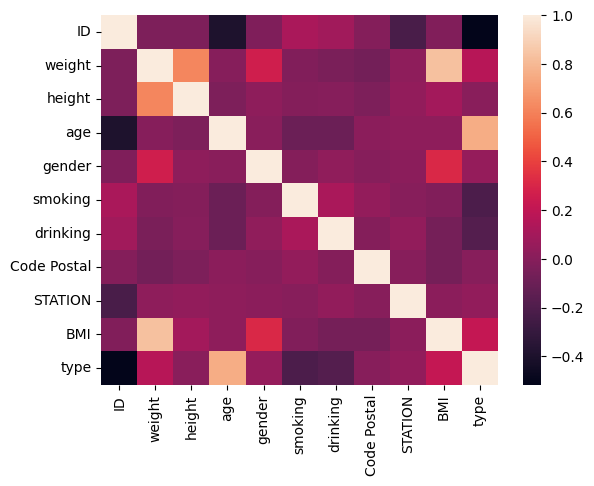

In [10]:
class Deep :
  def deepLeaning(self):
    risk = pd.read_table("/content/riskData.csv",sep=";",header=0 )
    noRisk = pd.read_table("/content/noRiskData.csv",sep=";",header=0)
    # Add coluna `type` a `pessoas de risco` com o valor 1
    risk['type'] = 1

    # Add coluna `type` a `pessoas sem risco` com o valor 0
    noRisk['type'] = 0
    # Append `noRisk` to `Risk`
    peoples = risk.append(noRisk, ignore_index=True)
    print(peoples)
    corr = peoples.corr()
    sb.heatmap(corr,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)
    # Specify the data, the target labels and flatten the array
    X=peoples.iloc[:,0:10]
    y=np.ravel(peoples.type)

    # Split the data up in train ande test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Define the scaler
    scaler = StandardScaler().fit(X_train)
    # Scaler the train set and Scaler the test set
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # initialize the constructor
    model = Sequential()
    # Add an input layer
    model.add(Dense(12, activation='relu', input_shape=(10,)))
    # test with tanh
    # Add one hidden layer
    model.add(Dense(8, activation='relu'))
    # Add an output layer
    model.add(Dense(1, activation='sigmoid'))

    # Model output shape
    model.output_shape
    print("model output shape")
    print("model summary")
    model.summary()

    # Model configuration
    print("model config")
    model.get_config()
    # List all weight tensioners
    print("list all weight tensors")
    model.get_weights()

    # Training & testing
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X_train, y_train,epochs=50, batch_size=1, verbose=1)

    y_pred = model.predict(X_test)
    print("y_pred")
    print(y_pred[:10])
    print("y_test")
    print(y_test[:10])

    score = model.evaluate(X_test, y_test,verbose=1)
    print("score: ")
    print(score)

if __name__ == '__main__':
  deep = Deep()
  deep.deepLeaning()

Podemos ver que indivíduos em risco são previstos com sucesso (y_test = 1) com uma precisão de 0,96